In [1]:
import os
import glob
import pandas as pd 
import numpy as np
from scipy.stats import truncnorm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

E:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [133]:
df_shk = pd.read_csv('shahre_kord.csv')
df_shk = df_shk[df_shk.Ei != 0].reset_index(drop = True)
df_shk.Inci = df_shk.Inci / 10e5
df_shk = df_shk[df_shk.hhsi<5].reset_index(drop = True)
df_shk.Zone = list(range(1, df_shk.shape[0]+1))
y = df_shk['production']
X = df_shk.drop(['Zone', 'P-Wo', 'P-Sh','production'], axis = 1).reset_index(drop = True)
df_shk

,Zone,P-Wo,P-Sh,Ei,Ci,Inci,Sti,hhsi,production
0,1,182,390,300,0.265,2.943801,199,3.26,572
1,2,390,299,266,0.265,2.943801,127,3.18,689
2,3,1010,695,520,0.209,2.649290,309,3.15,1705
3,4,515,772,439,0.209,2.649290,273,3.08,1287
4,5,216,136,110,0.265,2.943801,67,3.45,352
...,...,...,...,...,...,...,...,...,...
56,57,2134,2109,1105,0.188,2.532398,661,3.29,4243
57,58,2189,1502,1167,0.188,2.532398,595,3.09,3691
58,59,1817,930,1058,0.188,2.532398,726,3.16,2747
59,60,2502,1752,1319,0.188,2.532398,793,3.24,4254


In [134]:
min_max_scaler = preprocessing.MinMaxScaler()

X_normalized = X.values #returns a numpy array
X_normalized = min_max_scaler.fit_transform(X_normalized)
X_normalized = pd.DataFrame(X_normalized)

In [135]:
X_normalized

,0,1,2,3,4
0,0.122844,0.693069,0.465280,0.127080,0.410853
1,0.105071,0.693069,0.465280,0.072617,0.348837
2,0.237846,0.415842,0.352715,0.210287,0.325581
3,0.195504,0.415842,0.352715,0.183056,0.271318
4,0.023523,0.693069,0.465280,0.027231,0.558140
...,...,...,...,...,...
56,0.543649,0.311881,0.308037,0.476551,0.434109
57,0.576059,0.311881,0.308037,0.426626,0.279070
58,0.519080,0.311881,0.308037,0.525719,0.333333
59,0.655515,0.311881,0.308037,0.576399,0.395349


In [136]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=2)

In [162]:
# make sure to import all of our modules
# sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# dataframes
import pandas as pd
# computation
import numpy as np
# visualization
import matplotlib.pyplot as plt

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=3)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_train)

In [163]:
y_values = y_train
x_values = x_train

In [164]:
# let's fit the model
#poly_model.fit(poly_x_values, y_values)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

y_pred = np.asarray(y_pred, dtype = 'int')

mean_squared_error(y_values, y_pred, squared=False)

0.5345224838248488

In [143]:
regression_model = LinearRegression()

regression_model.fit(x_values, y_values)
regression_model.score(x_test, y_test)

0.8221404317292357

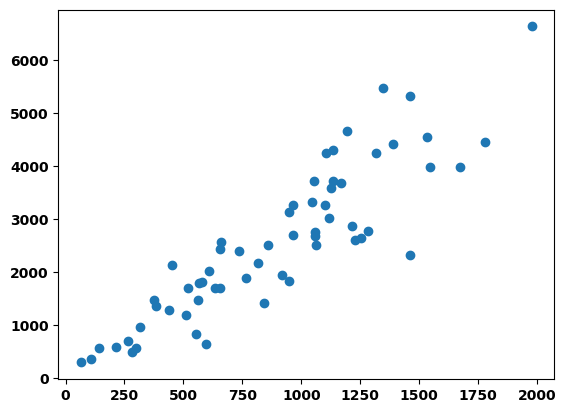

In [94]:
plt.scatter(df_shk.Ei, df_shk.production)
plt.show()

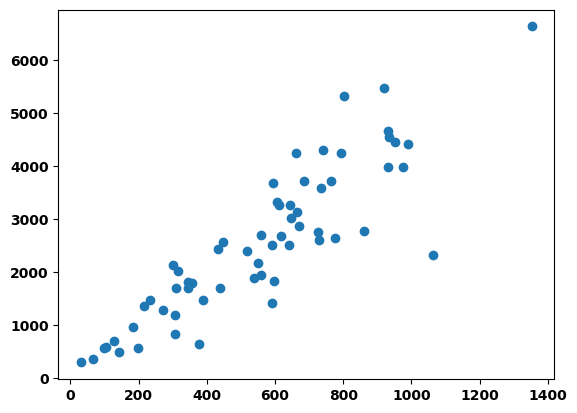

In [97]:
plt.scatter(df_shk.Sti, df_shk.production)
plt.show()

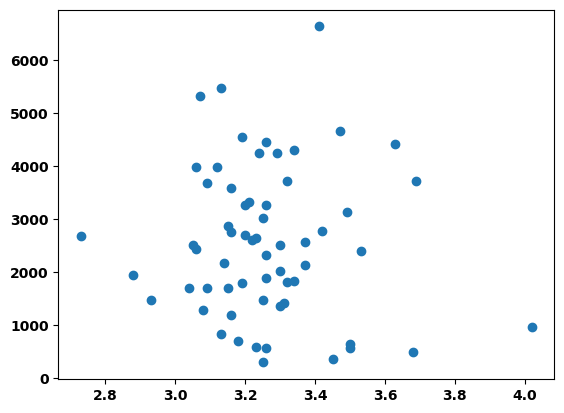

In [98]:
plt.scatter(df_shk.hhsi, df_shk.production)
plt.show()

In [109]:
regression_model.coef_

array([3200.03961081, 2198.41441007,  231.9082086 ])

In [110]:
regression_model.intercept_

198.16679347862691

In [145]:
a = pd.DataFrame(data = {'predict':y_pred,'actual':y_train})
a[a['predict'] == a['actual']].shape

(30, 2)

In [146]:
30/42

0.7142857142857143

In [127]:
42/61

0.6885245901639344

In [165]:
a.actual.mean()

2519.309523809524

In [166]:
a.actual.max()

5478

In [167]:
a.actual.mean()

2519.309523809524

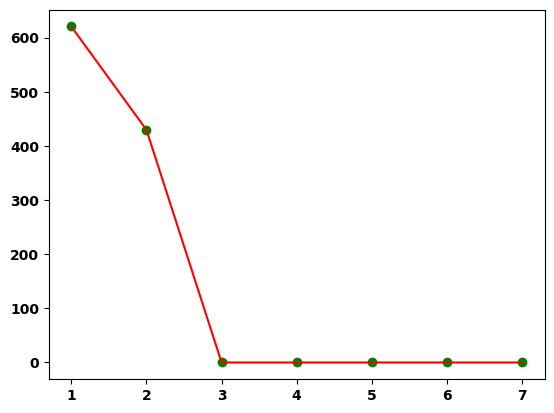

In [139]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)

    poly_x_values = poly_model.fit_transform(x_values)
    #poly_model.fit(poly_x_values, y_values)

    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)

    plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 